# Computer Vision for Beginners: Part 4

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- Part 2: The basics of image processing with filtering
- Part 3: From feature detection to face detection
- ***Part 4: Image Segmentation and Watershed Algorithm***

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

## Contour Detection

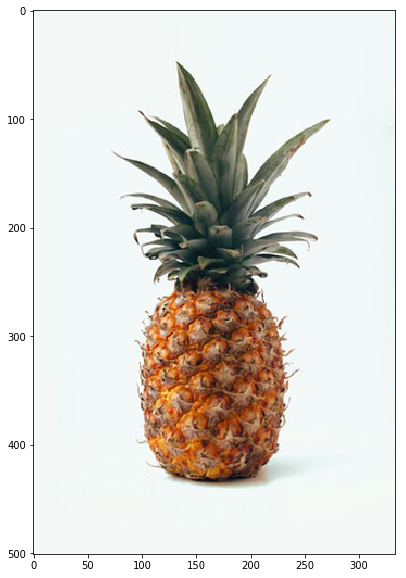

In [249]:
# load the iamge
img = cv2.imread('images/banana.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

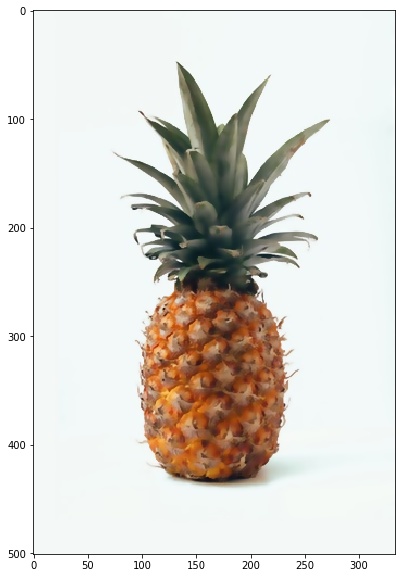

In [250]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
display(img_blur)

In [251]:
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

# Thresholding the image 
a = img_gray.max()

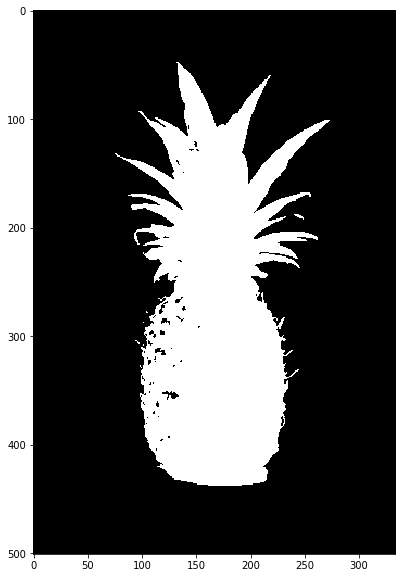

In [252]:
_, thresh = cv2.threshold(img_gray, a/2+60, a, cv2.THRESH_BINARY_INV)
display(thresh, cmap = 'gray')

In [253]:
# Find the contour of the figure 
image, contours, hierarchy = cv2.findContours(thresh, 
                                              mode = cv2.RETR_TREE, 
                                              method = cv2.CHAIN_APPROX_SIMPLE)

In [254]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

# First contour by the area 
c_0 = contours[0]
print("Area : ", cv2.contourArea(c_0))

Area :  37554.5


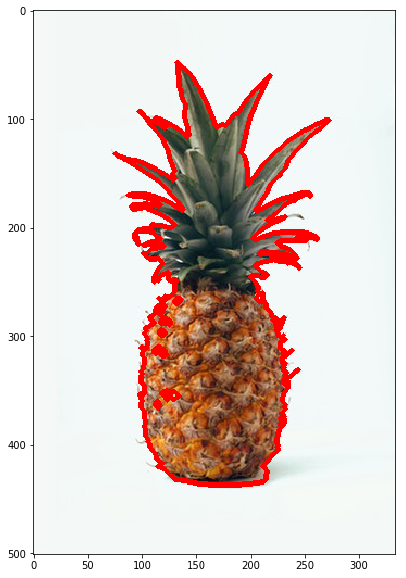

In [255]:
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 255, 255), thickness = 3)
display(img_copy)

## Convex hull

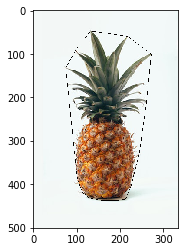

In [256]:
hull = cv2.convexHull(c_0)
img_hull = cv2.drawContours(img, [hull], 0, 3)
plt.imshow(img_hull)

In [48]:
x, y, w, h = cv2.minAreaRect(c_0)
img_blur = cv2.medianBlur(img, 35)

ValueError: not enough values to unpack (expected 4, got 3)

## Having a little fun with OpenCV

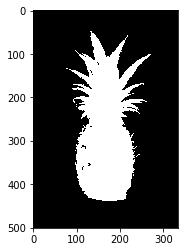

In [104]:
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
img_copy[img_copy < 255] = 0
plt.imshow(img_copy, cmap = 'gray')

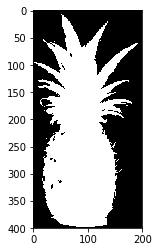

In [105]:
mask_inv = img_copy[40:440, 80:280]
plt.imshow(mask_inv, cmap = 'gray')

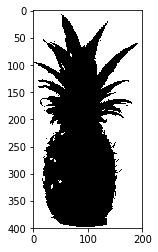

In [106]:
mask = cv2.bitwise_not(mask_inv)
plt.imshow(mask, cmap = 'gray')

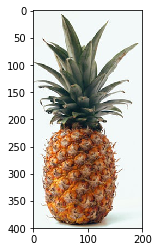

In [109]:
img_2 = img[40:440, 80:280]
plt.imshow(img_2)

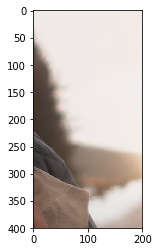

In [108]:
backpacker = cv2.imread('images/backpacker.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
roi = backpacker[900:1300, 850:1050]
plt.imshow(roi)

In [70]:
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
img_gray.max()

255

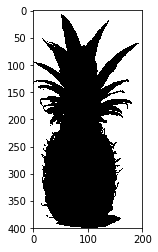

In [71]:
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap = 'gray')

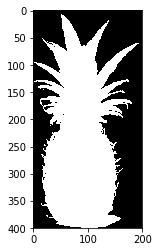

In [72]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap = 'gray')

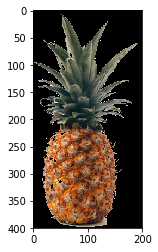

In [110]:
img_fg = cv2.bitwise_and(img_2, img_2, mask = mask_inv)
plt.imshow(img_fg)

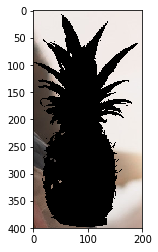

In [111]:
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
plt.imshow(img_bg)

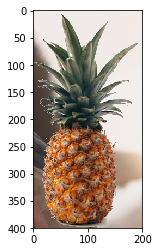

In [112]:
dst = cv2.add(img_fg, img_bg)
plt.imshow(dst)

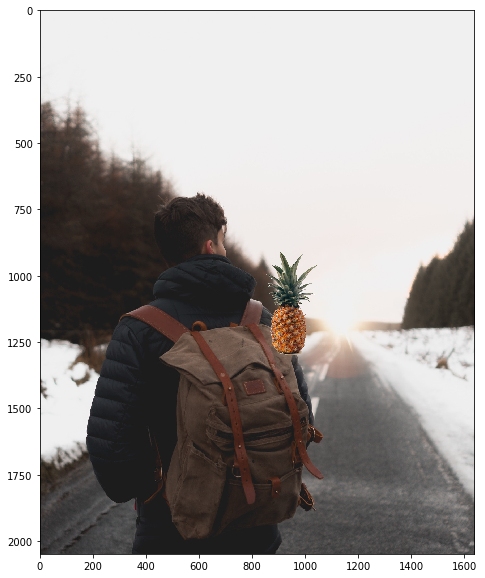

In [113]:
backpacker[900:1300, 850:1050] = dst
display(backpacker)